# __CMSE  201 - Spring 2020__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image001.png"
     alt="CMSE Grapical Image"
     style="float: right; margin-right: 10px;" 
     height="164" 
     width="164" />


# The Simulation of Two restaurants in ABM

### &#9989; Hao Wang
### &#9989; Section_001
#### &#9989; 4/18

___

## Background and Motivation

This Project want to simulate dynamic changing in different Food Delivery APP's strategy by uisng the Agent Based Model. We assume that there are 64 customers in town and there are two food delivery Apps, they can use to order foods. There are two rules:

* If all friends around a person to eat in same place, the person will have more chance go to that restaurant. 
* If one company dropped their price in restaurant to a very low point, the customer will choose to eat more times in this restaurant


In [116]:
#import Part
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pandas as pd
import seaborn as sns
from IPython.display import display, clear_output
import random as rd
import time

## Methodology

First, we set up Restarant_A,  Restarant_B.

we seperate the total 64 people in three categories, which represent customer's preference in these two restaurants. 
* 1: people very like to eat in Restaurant_B, no matter the marketing strategy other restaurant used to attract more customers. 
* 0: people very like to eat in Restaurant_A, no matter the marketing strategy other restaurant used to attract more customers.
* (0-1): In this interval, people mostly likely are effected by different marketing strategies. For example, if Restaurant-A dropped their price, this kind of poeple willing to change their taste. 


In [117]:
def create_board(length = 8, width = 8):   # create the board first
    
    board = np.zeros((length,width))
    for i in range(length):
        for j in range(width):
            p = rd.uniform(0,1)  # produce the random number
            if p<0.2:   #we set 0.2 as a benchmark to distinguish whether this customer like to eat restaruant-A or not
                board[i,j] = 0 # If the value smaller than 0.2, we can assign this customer into category of liking restaurant-A. 
            if p>0.2 and p<0.8:
                board[i,j] = round(rd.uniform(0,1),2)                
            if p>0.8:   # #we set 0.8 as a benchmark to distinguish whether this customer like to eat restaruant-A or not
                board[i,j] = 1 # If the value greater than 0.8,we can assign this customer into category of liking restaurant-B. 
    return board

demo = create_board() # trying first time
demo

array([[0.23, 1.  , 0.39, 0.99, 0.96, 1.  , 0.98, 0.49],
       [0.26, 0.5 , 0.  , 0.  , 0.64, 0.  , 1.  , 0.39],
       [1.  , 1.  , 0.51, 0.09, 1.  , 1.  , 1.  , 0.38],
       [0.  , 1.  , 0.61, 0.12, 0.77, 0.94, 0.3 , 1.  ],
       [0.95, 0.  , 0.  , 0.45, 0.29, 1.  , 0.83, 0.33],
       [1.  , 0.96, 0.55, 0.02, 0.  , 0.  , 0.03, 0.3 ],
       [0.14, 0.  , 0.9 , 0.63, 0.49, 0.98, 0.22, 0.67],
       [1.  , 0.73, 1.  , 0.5 , 0.  , 0.97, 1.  , 0.61]])

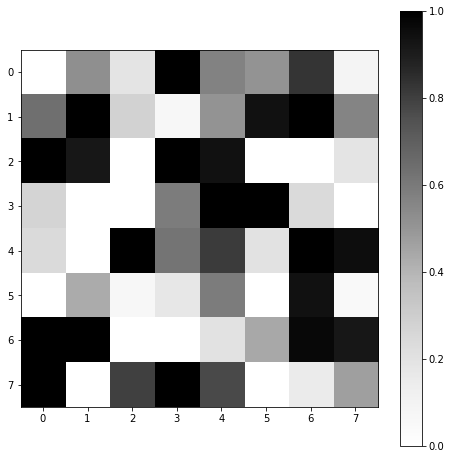

In [118]:
# visualized this board to easily see this scenario. 
empty_board = create_board()

fig = plt.figure(figsize=(8,8))

plt.imshow(empty_board, cmap='Greys')
plt.colorbar()

In [119]:
def onboard(i,j,a):   # to see wether this cusomter is in this board
    if i <= 7 and i >=0:
        if j <=7 and j >=0:
            return True
        else:
            return False
    else:
        return False

In [120]:
def getneighbor_value(i,j,board): # get their neighbor value and then we can see how a specific customer has been effected
                                # by his friends or neighbors. 
    neighborhood = [[i-1,j],[i+1,j],[i,j+1],[i,j-1]]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onboard(neighbor[0],neighbor[1],board) == True:   # 0 is i-1, 1 is the j, neighbor is just the i as before
            neighbor_values.append(board[neighbor[0],neighbor[1]])
    return neighbor_values 

In [121]:
def plotgrid(myarray):
    
    # first create two vectors based on the x and y sizes of the grid
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) # x means horizontal!
    #from 0 to horizontal limits -1, then this is the correct interval in this space, 1 means how many coloumn in here. 
    
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0]) # y means vertical!
    
    
    
    # use the numpy meshgrid function to create two matrices 
    # of the same size as myarray with x and y indexes
    x_indexes, y_indexes = np.meshgrid(x_range, y_range) 
    
    
    
    
    # make a list of all the x and y indexes that are either squares or triangles.
    # the notation below is relatively new to us; it means that when myarray==(value),
    # only record those values. 
    tr_x = x_indexes[myarray == 1];   # when myarray equals 1, it will return the index(position) of this cell
    tr_y = y_indexes[myarray == 1];
    sq_x = x_indexes[myarray == 2]; 
    sq_y = y_indexes[myarray == 2];
    
    
    
    # plot the squares and triangles.  make the size of the polygons 
    # larger than the default so they're easy to see!
    # Note: we have to reverse the y values to make sure it plots with the right orientation
    plt.plot(tr_x,  myarray.shape[0] - tr_y - 1, '^g',markersize=20)  
    
    
    # what is the meaning of tr_y - 1
    
    
    plt.plot(sq_x,  myarray.shape[0] - sq_y - 1,markersize=20)
    
    # Set the x and y limits to include half a space overlap so we don't cut off the shapes
    plt.ylim([-0.5,myarray.shape[0] + 0.5]) 
    
    # ylim? 
    
    plt.xlim([-0.5,myarray.shape[1] + 0.5])
    
    # Turn the axes off
    plt.axis('off')

In [122]:
#One day iteration to see what is the final revenue for each restaurant. 
a = create_board()
print(a)
discounts_A = 0.9 # 10% people more will eat to Restaurant-A



[[1.   1.   1.   0.6  0.52 0.   0.   0.4 ]
 [0.   1.   1.   0.   0.   0.11 0.08 0.  ]
 [0.21 0.4  0.   0.   0.47 0.77 0.6  1.  ]
 [0.77 0.89 1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.55 1.   1.   0.52 0.85 1.  ]
 [0.   0.   0.52 0.73 0.02 1.   0.97 0.67]
 [1.   0.83 0.   0.14 0.16 0.91 0.   0.17]
 [0.26 1.   0.53 0.22 0.3  0.7  0.84 0.63]]


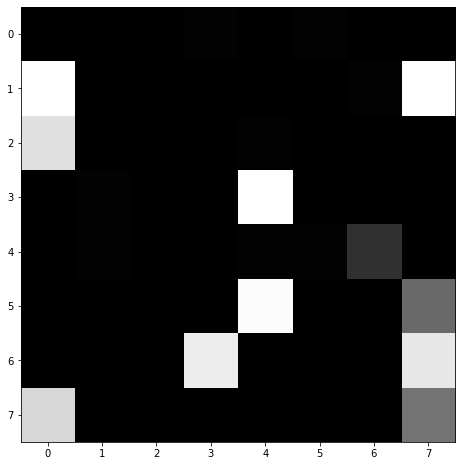

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [123]:
# Simulation

revenue = 0
for i in range(20):  # The period of dynamic changing is 20 days.
    
    if i == 5:  # On day05, More people willing to eat in Restaurant-A
        a = a*0.9
    if i == 10:  # On day 10, More people willing to eat in Restaurant-B, we just assumed the change happened in this day,
        a = a*1.1  # when a is getting bigger, more people are willing to eat in Restaurant. 
        
    a[a>1] =1  
    x = np.random.randint(0,8,size = 5)
    y = np.random.randint(0,8,size = 5)
    s = np.array(getneighbor_value(x[r],y[r],a)).sum() # following the rule 1, picking the person's neighbors
                                                        #average these values to see wether this average greater than two or not 
    for r in range(5):
        #s = list(s)
        if s*4/s.size>2:  # if this average greater than two, we assume this people will change his/her preference 
                            #under the impacts of his friends 
            a[x[r],y[r]] = 1
        else:
            a[x[r],y[r]] = 0 # otherwise, the people willing to eat in Restaurant-A
    expectation = a.sum()*40
    revenue += expectation   # calculate the revenue for each restaurant. 
    
    fig = plt.figure(figsize=(8,8))

    plt.imshow(a, cmap='Greys')
        
    #fig = plt.figure(figsize=(8,8))
    
    
    # Animation part 
    time.sleep(0.5)         # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    
plt.close()                 # Close dynamic display

## Results

In [124]:
# The interpretation will be showed in Slides about this plot.
print(a)

[[1.     1.     1.     0.99   1.     0.99   1.     1.    ]
 [0.     1.     1.     1.     1.     1.     0.99   0.    ]
 [0.2079 1.     1.     1.     0.99   1.     1.     1.    ]
 [1.     0.99   1.     1.     0.     1.     1.     1.    ]
 [1.     0.99   1.     1.     0.99   0.99   0.8415 1.    ]
 [1.     1.     1.     1.     0.0198 1.     1.     0.6633]
 [1.     1.     1.     0.1386 1.     1.     1.     0.1683]
 [0.2574 1.     1.     1.     1.     1.     1.     0.6237]]


53.7615
0.3267000000000001
1.7523000000000004


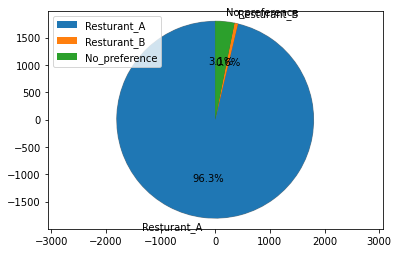

In [149]:
#analysis and plot
R_A = 0 
R_B = 0
middle = 0 
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i,j] > 0.8:
            R_A += a[i,j]
        elif a[i,j] < 0.2:
            R_B += a[i,j]
        else:
            middle += a[i,j]          
print(R_A)
print(R_B)
print(middle)

labels = 'Resturant_A', 'Resturant_B','No_preference'


sizes = [R_A, R_B, middle]
explode = (1, 1, 1) 
fig1, ax1 = plt.subplots()

font1 = {'family' : 'cursive','stretch': 'ultra-condensed', 'weight' : 'normal','size'   : 20,'color':"limegreen"}

plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,radius = 1800.0,frame=True)

plt.axis('equal')

plt.legend(
    loc='upper left',
    labels=['Resturant_A', 'Resturant_B','No_preference'])

plt.show()

Based on this results, I found that there are 96.3% of people are wiling to eat in Restaurant A and there are only 1% of people are willing to eat in Restaurant B. There still 3% people did not change their preference after adding thes e two rules.

**Notes: The result may changed based on different run, becasue the number are randomly produced in the begining.**

## Discussion and Conclusion

Based on my model, I found that small changes in random number in the begining stage could lead a huge difference, especially in adding these two rules. I observed there are 4 more blacks area in the first plot, however, after runing 20 times, and the results has changed a lot. We can find the the category of Restaurant_A weighted almost 24 more times than other two together in final result. Therefore, I think this two rules may enlarge the initial gap in this scenario. It is make sense that if there are more people initial like to eat in a restaurant may based on some random facts such as location, and then the suitable marketing strategy and the effects of social need or the impacts of friends will lead more people to eat in this restaurants. 

In the next time, I will add more variables in this model such as location, types of foods and size of restaurant. And I plan to insert the game theory into this model to see what is the best strategy for restaurants. By adding more varibales and escale my model, it will be more realistic. 

### References

I used two functions from my Day-12_Pre-Class_ABMForestFire-STUDENT.ipynb. There functions are plotgrid, getneighbor_value. 